# Example of pre-measurement design

## Pressure transducer choice of parameters

We require to choose a pressure transduced such that we could measure a signal up to 100 Hz with a dynamic 
error of up to 5%. 

The pressure transducers available in the lab is measured to have damping of $\zeta = 0.5$ and ringing frequency of 1200 Hz. 

In [1]:
%pylab inline
from scipy import signal
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'E [V]')

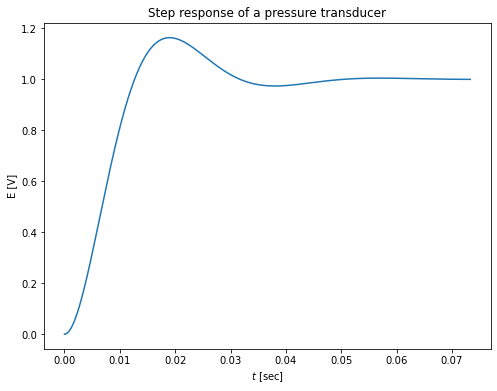

In [2]:
# Define transfer function
fn = 1200 # Hz
wn = fn/(2*np.pi) # rad/s
z=0.5     # damping
k = 1 		# sensitivity


sys = signal.lti(k*wn**2,[1,2*z*wn, wn**2])

# step function output
t,y = sys.step(N=1000)

figure(figsize=(8,6))
plot(t,y)
title('Step response of a pressure transducer')
xlabel('$t$ [sec]')
ylabel('E [V]')


In [3]:
# note that sampling is sufficient, if not we need to apply the D/A reconstruction
# or interpolations, which will add more noise and uncertainty to the system identification

Text(0, 0.5, 'Phase, deg.')

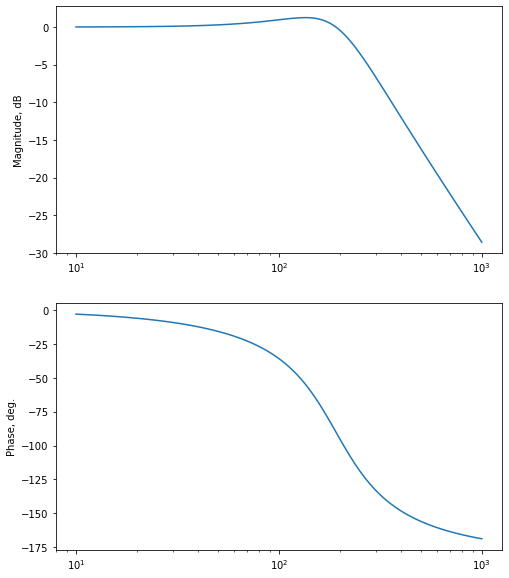

In [4]:
w, mag, phase = signal.bode(sys)

fig,ax = subplots(2,1,figsize=(8,10))
ax[0].semilogx(w, mag)    # Bode magnitude plot
ax[0].set_ylabel('Magnitude, dB')
ax[1].semilogx(w, phase)  # Bode phase plot
ax[1].set_ylabel('Phase, deg.')